In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2024-07-27 16:07:27.172605: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-27 16:08:12.826854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-27 16:10:00.185778: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB
TensorFlow version: 2.13.1


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #input getting reshaped 
  tf.keras.layers.Dense(128, activation='relu'),#hidden
  tf.keras.layers.Dropout(0.2), #drops 20 % of neuron
  tf.keras.layers.Dense(10) # final layer , 10 -cz i have 10 different classes to predict
])

In [18]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2988 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1446 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1101 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0888 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0761 - accuracy: 0.9764


In [21]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [34]:
# probability_model(x_test[:100])

In [24]:
x_test.shape

(10000, 28, 28)

In [35]:
a = probability_model(x_test[:100])

In [36]:
import numpy as np
b = np.argmax(a, axis = 1)
b

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

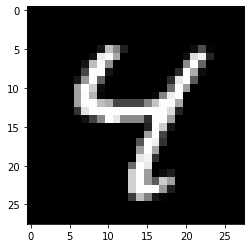

In [37]:
import matplotlib.pyplot as plt 
plt.imshow(x_test[6], cmap = 'gray')

In [32]:
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    